In [1]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import models
from models import normalizar_sinal, ml_functions

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier

from models.data_tools import DataGenerator
from models.data_vis import (PostProcessing, RawVisualization)


In [2]:
# Carrega os dados, ignorando a primeira linha
dados_normalizados = 'Dados_Normalizados.csv'
dados_extraidos_geral = 'dados_extraidos_concatenado.csv'
dado_sensor = 'dados_extraidos_rolamento_interno_radial1.csv'

seed = 15

Método RandomForestClassifier exportado com sucesso!
tudo ok


ValueError: The number of FixedLocator locations (16), usually from a call to set_ticks, does not match the number of ticklabels (2).

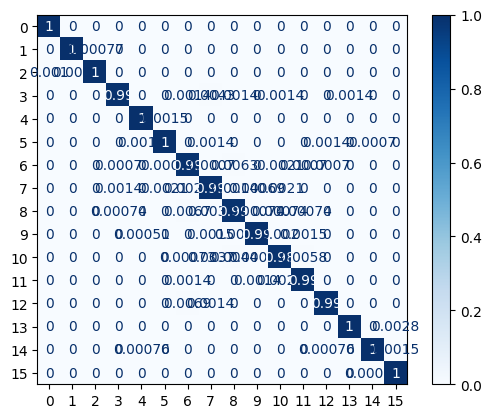

In [3]:
for ordem in range(11)[1:11]:
    pasta = f'{models.path_dados_tratados}/ordens_{ordem}/{dados_normalizados}'
    df = pd.read_csv(pasta, header=0)

    score = {}

    # Executa a predição
    classifier = ml_functions.Classifier(data = df, classifier=RandomForestClassifier, random_state = seed,ordem=ordem)
    classifier.run()
    score[f"{classifier.classifier.__class__.__name__}"] = round(classifier.score * 100,2)
    PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__,ordem=ordem).plot_confusion_matrix()

    classifier = ml_functions.Classifier(data = df, classifier=KNeighborsClassifier,ordem=ordem)
    classifier.run()
    score[f"{classifier.classifier.__class__.__name__}"] = round(classifier.score * 100,2)
    PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__,ordem=ordem).plot_confusion_matrix()

    classifier = ml_functions.Classifier(data = df, classifier=SVC, random_state = seed,ordem=ordem)
    classifier.run()
    score[f"{classifier.classifier.__class__.__name__}"] = round(classifier.score * 100,2)
    PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__,ordem=ordem).plot_confusion_matrix()

    classifier = ml_functions.Classifier(data = df, classifier=GaussianNB,ordem=ordem)
    classifier.run()
    score[f"{classifier.classifier.__class__.__name__}"] = round(classifier.score * 100,2)
    PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__,ordem=ordem).plot_confusion_matrix()

    classifier = ml_functions.Classifier(data = df, classifier=NuSVC, random_state = seed,ordem=ordem)
    classifier.run()
    score[f"{classifier.classifier.__class__.__name__}"] = round(classifier.score * 100,2)
    PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__,ordem=ordem).plot_confusion_matrix()

    classifier = ml_functions.Classifier(data = df, classifier=DecisionTreeClassifier, criterion = "entropy",ordem=ordem)
    classifier.run()
    score[f"{classifier.classifier.__class__.__name__}, "] = round(classifier.score * 100,2)
    post_processing = PostProcessing(classifier, method_name = classifier.classifier.__class__.__name__,ordem=ordem)
    post_processing.plot_confusion_matrix()

    PostProcessing.plot_score(score)


In [ ]:
from models import ml_visualizacao

ml_visualizacao.PostProcessing(RandomForestClassifier,RandomForestClassifier.__name__,2)